In [19]:
import networkx as nx

In [38]:
import numpy as np

# Read the content of 'data.txt' into a NumPy array
with open('data.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix = np.array(data)

print(adjacency_matrix.shape)


(26, 26)


In [45]:
for i in range(0,26):
    for j in range(0,26):
        if adjacency_matrix[i][j] == 9:
            adjacency_matrix[i][j] = 0
    adjacency_matrix[i][i] = 0     

In [46]:
symmetric_matrix = adjacency_matrix * adjacency_matrix.T
print(symmetric_matrix)
print(symmetric_matrix.diagonal())

[[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 

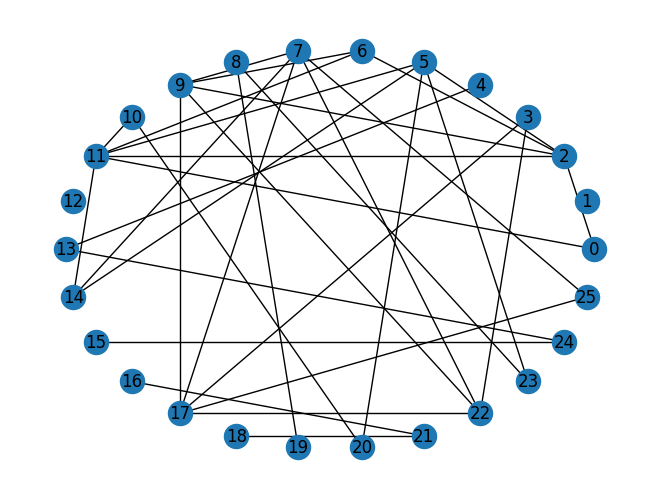

In [47]:
# Save the modified adjacency matrix to a new file
g = nx.from_numpy_array(symmetric_matrix)
# np.savetxt('modifiedt2_matrix.txt', adjacency_matrix, delimiter=' ')
#nx.draw_networkx(g)
nx.draw_circular(g, with_labels = True)

In [61]:
print( nx.shortest_path( g, '7', '6' ) )
print( nx.diameter( g ) )
# components ?
[ print( e ) for e in nx.strongly_connected_components( g ) ]

['7', '3', '1', '5', '6']
5
{'1', '4', '0', '3', '5', '6', '7', '2'}


[None]

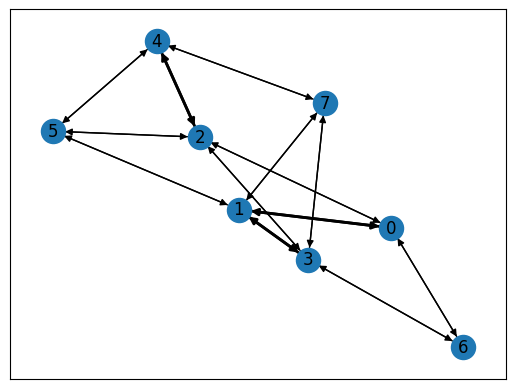

In [68]:
import numpy as np
from scipy.sparse import csr_matrix

# from graph to matrix
m = nx.adjacency_matrix( g ).toarray() # the ndarray version of the matrix

#print( m )

# transpose
m_t = m.transpose()

#print( m_t )

# generic matrix combination operation
def combine( m1, m2, op ):
    assert( np.shape( m1 ) == np.shape( m2 ) )
    dim = np.shape( m1 )
    if ( len( dim ) == 1 ):
        res = np.array( m1 )
        for i in range( 0, dim[ 0 ] ):
            res[ i ] = op( m1[ i ], m2[ i ] )
        return res
    else:
        res = np.array( m1 )
        for i in range( 0, dim[ len( dim ) - 1 ] ):
            res[ i ] = combine( m1[ i ], m2[ i ], op )
        return res
    
SYM_UNION = (lambda x, y: x | y)     # OR
SYM_INTERSECT = (lambda x, y: x & y) # AND

# symmetrisation (via transpose)
sym_uni = combine( m, m_t, SYM_UNION )
sym_int = combine( m, m_t, SYM_INTERSECT )
#print( np.matrix( sym_uni ) )
#print( np.matrix( sym_int ) )

g_uni = nx.from_numpy_array( sym_uni, create_using=nx.DiGraph )
#nx.draw_networkx( g_uni )
g_int = nx.from_numpy_array( sym_int, create_using=nx.DiGraph )
#nx.draw_networkx( g_int )

m_sum = combine( m, m_t, (lambda x, y: x + y ) )
g_sum = nx.from_numpy_array( m_sum, create_using=nx.DiGraph )
nx.draw_networkx( g_sum, width=[ g_sum[v1][v2]['weight'] for v1,v2 in g_sum.edges() ] )
